# Medical Cost Personal Insurance Project

Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance


Problem Statement:- To predict insurance costs

In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle

In [22]:
# Importing dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

# Exploratory Data Analysis (EDA)

In [23]:
# Chceking the number of rows & coloumns in dataset
df.shape

(1338, 7)

There are 1338 roes & 7 cloumns

In [24]:
# last 5 Rows
df.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [25]:
# First 5 Rows
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [26]:
# Checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset does not have any null values

The number of null values are: age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


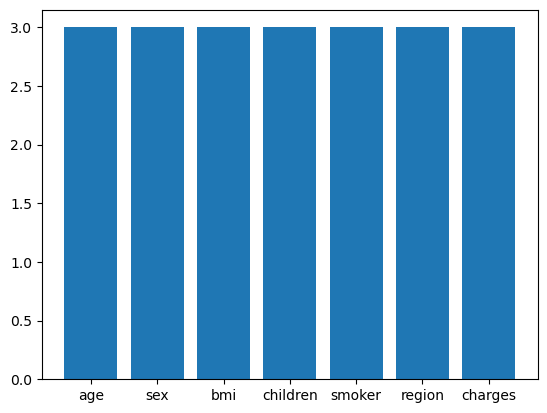

In [27]:
# Graphical representation of null values
plt.bar(x=df.columns, width=0.8, data=df.isnull(), height=3)
print("The number of null values are:", df.isnull().sum())

In [28]:
# Checking for nan values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No Nan values present in the dataset

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Takeaways:
    1. There are total 7 columns
    2. There are total 1338 datas
    3. There is no null, nan or white spaces in the dataset
    4. We have 2 float columns, 2 int coloumns & 3 object datatype columns

In [30]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Takeaways:-
    1. Age & Children columns are of integer datatype
    2. Sex, Smoker & Region columns are of object datatype
    3. Bmi & Charges are float datatype

In [31]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

No white sapces & null values present

In [32]:
# To get the names of the columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [33]:
# To get the unique values in each column
for i in df.columns:
    print(df[i].nunique())

47
2
548
6
2
4
1337


In age column we have 47 unique values, in sex we have 2 unique values, in bmi we have 548 unique values, in children we have 6 unique values, in smoker we have 2 unique values, in region we have 4 unique values & in charges we have 1337 unique values.

In [34]:
# To get the statistical summary of non categorical datas
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Takeaways:-
    1. There are total 1338 values present in all the columns this shows that there is no missing values.
    2. Since the mean is greater than median(50%), we can conclude that our data is right skewed.
    3. We can also see that there is huge gap between 75% and max value in Charges column which means outliers are present. 

# Data Visualisation

Univariate Analysis

<AxesSubplot:ylabel='Frequency'>

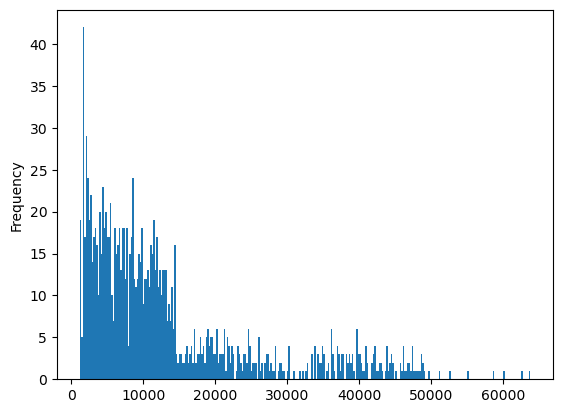

In [35]:
df.charges.plot(kind="hist", bins=300)

Majority of the data lies between 1000 to 13000. And the maximum frequency is 43

<AxesSubplot:ylabel='Frequency'>

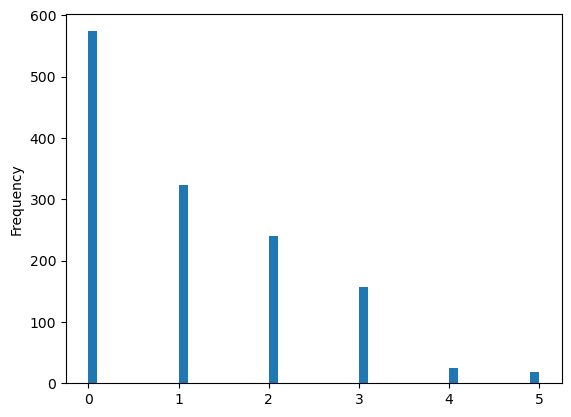

In [36]:
df.children.plot(kind="hist", bins=50)

Majority of the people don't have children.

<AxesSubplot:ylabel='Frequency'>

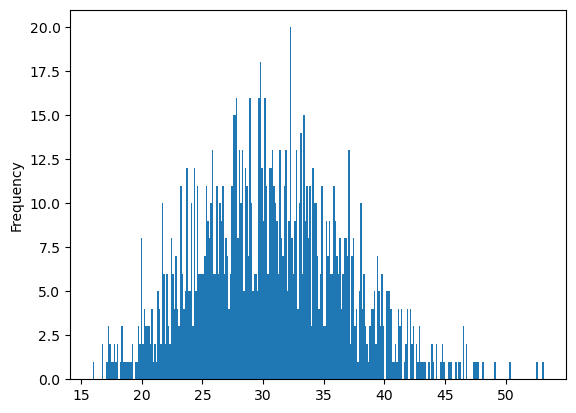

In [37]:
df.bmi.plot(kind="hist", bins=300)

The graph is normally distributed

<AxesSubplot:ylabel='Frequency'>

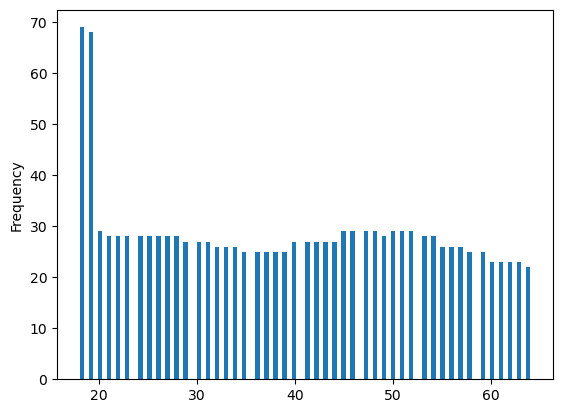

In [38]:
df.age.plot(kind="hist", bins=100)

BiVariate Analysis

<AxesSubplot:xlabel='sex', ylabel='charges'>

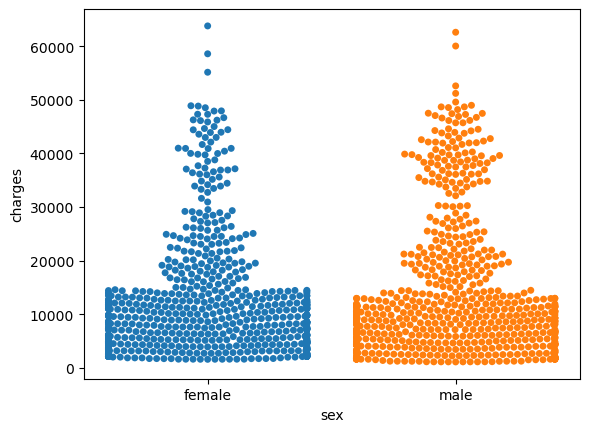

In [39]:
sns.swarmplot(x="sex", y="charges", data=df)

The highest amount of insurance charges is incurred by female which is  more than 60,000. The number of males have taken incurred more charges than the females

<AxesSubplot:xlabel='region', ylabel='charges'>

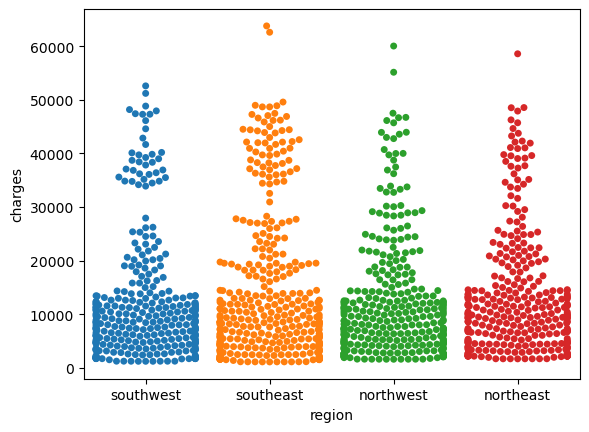

In [40]:
sns.swarmplot(x="region", y="charges", data=df)

The highest charges are incurred in south east region, followed by northwest then northeast and at last we have south west.
ANd number of charges incurred is highest in southeast

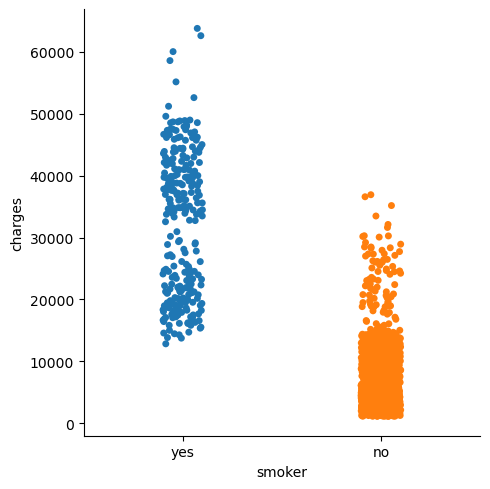

In [41]:
sns.catplot(x="smoker", y="charges", data=df)

Those who smoke pays more charges comparatively to the those who don't smoke

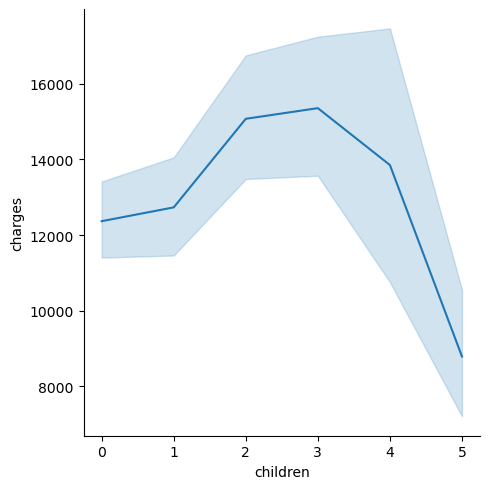

In [42]:
sns.relplot(x="children", y="charges", data=df, kind='line')


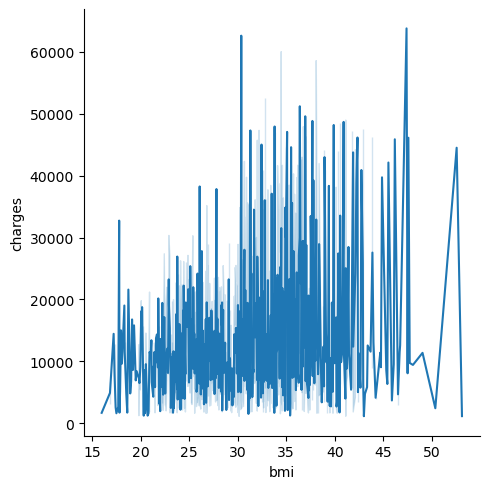

In [43]:
sns.relplot(x="bmi", y="charges", data=df, kind='line')


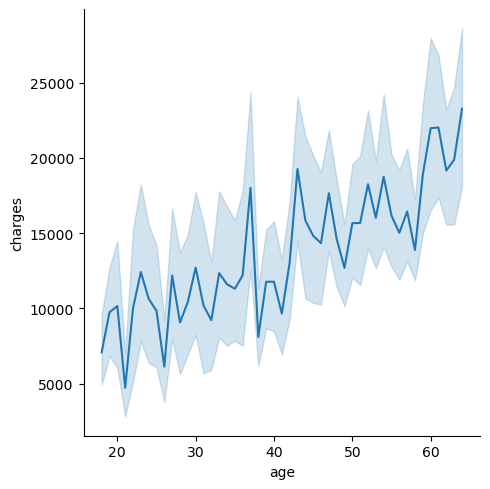

In [44]:
sns.relplot(x="age", y="charges", data=df, kind='line')

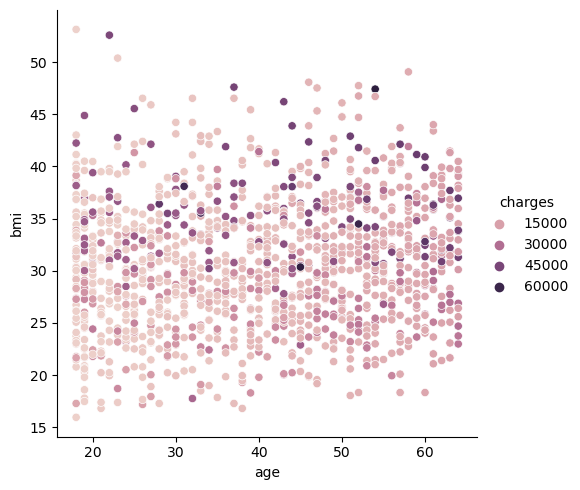

In [45]:
sns.relplot(x="age", y="bmi",hue="charges", data=df )

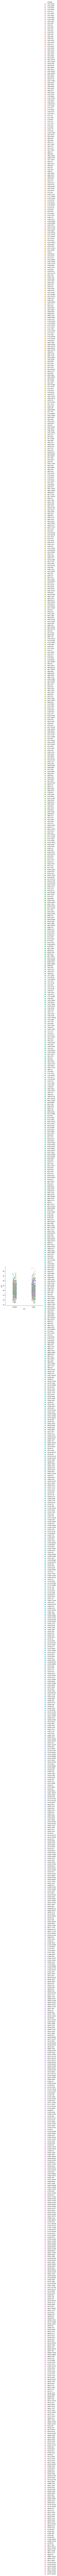

In [46]:
sns.catplot(x='sex', y="bmi", data=df, hue="charges")

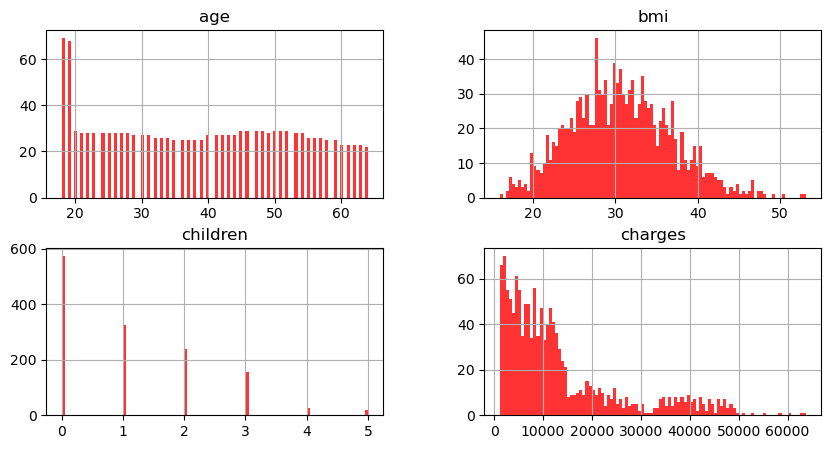

In [47]:
df.hist(color='r', alpha=0.8, figsize=(10,5), bins=100)
plt.show()

<AxesSubplot:xlabel='age'>

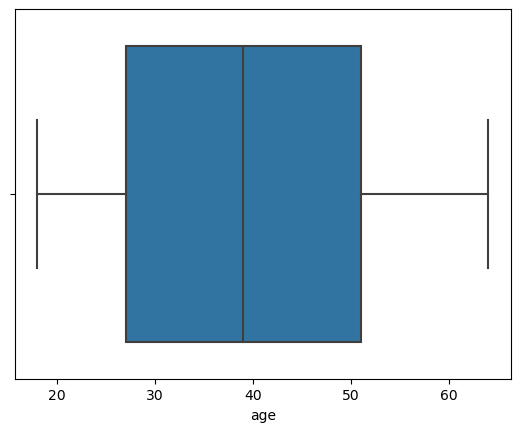

In [48]:
# To check the outliers
sns.boxplot(x = 'age', data = df)

No outliers present

<AxesSubplot:xlabel='children'>

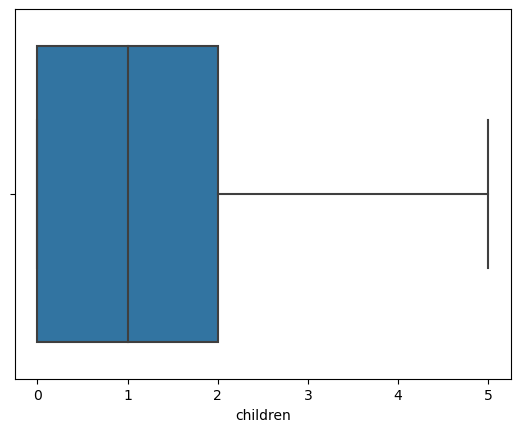

In [49]:
sns.boxplot(x = 'children', data = df)

No outliers present

<AxesSubplot:xlabel='bmi'>

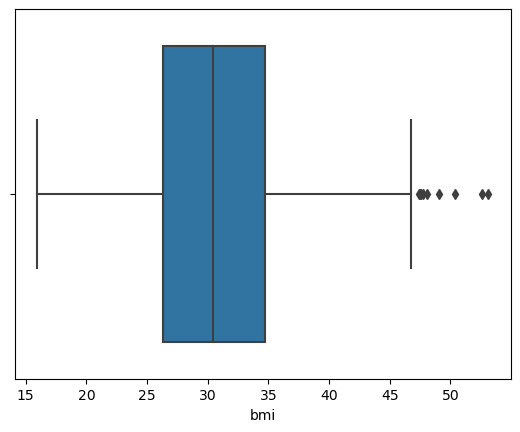

In [50]:
sns.boxplot(x = 'bmi', data = df)

Significant amount of outliers present

In [51]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

Removing outliers

In [52]:
# creating new variable 

new=df[['age', 'children', 'bmi']]

# Finding 25th & 75th value

Q1 = new.quantile(0.25)
Q3 = new.quantile(0.75)

# Calculating Inter Quantile Range

IQR=Q3-Q1
print("The 25th value is:", Q1)
print("\n")
print("The 75th value is:", Q3)
print("\n")
print("The IQR is:", IQR)
print("\n")

# Above Upper bound

upper=Q3+1.5*IQR
print("Upper Bound:",upper)
print("\n")

#Below Lower bound

lower=Q1-1.5*IQR
print("Lower Bound:",lower)
print("\n")

#Anything above 47.29 & anything below 13.7 are outliers

newdf=df[~((df<lower)| (df>upper)).any(axis=1)]
print(newdf.shape)

#Calculating percentage loss of data

loss=(df.shape[0]-newdf.shape[0])/(df.shape[0])*100
loss

The 25th value is: age         27.00000
children     0.00000
bmi         26.29625
Name: 0.25, dtype: float64


The 75th value is: age         51.00000
children     2.00000
bmi         34.69375
Name: 0.75, dtype: float64


The IQR is: age         24.0000
children     2.0000
bmi          8.3975
dtype: float64


Upper Bound: age         87.00
children     5.00
bmi         47.29
dtype: float64


Lower Bound: age         -9.0
children    -3.0
bmi         13.7
dtype: float64


(1329, 7)


0.672645739910314

Outiers removed and we have 1329 rows in new dataframe

In [53]:
df.shape

(1338, 7)

In [54]:
# Importing library for zscore

from scipy.stats import zscore

# Performing zscore 

z=np.abs(zscore(new))
z

# Finding out where outliers are present (thresold value 3)

np.where(z>3)

# Creating new Data Frame after removing outliers

df1=df[(z<3).all(axis=1)]

print(df1.shape)

#Calculating percentage loss of data

loss=(df.shape[0]-df1.shape[0])/(df.shape[0])*100
loss

(1316, 7)


1.6442451420029895

Outliers removed from zscore and we have 1316 rows 

In [55]:
# Checking skweness (-.5 to +.5)

df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Children and age columns are skewed. Skewness should be between (0.5 to -0.5)
Charges is our target column so we don't remove skewness from that

In [56]:
# Removing skweness of children & age

df['age']=np.cbrt(df['age'])
df['children']=np.cbrt(df['children'])

Skewness removed

In [57]:
df.skew()

age        -0.228740
bmi         0.284047
children   -0.097116
charges     1.515880
dtype: float64

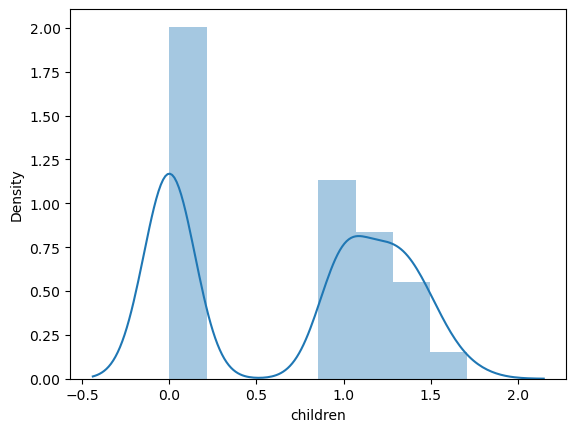

In [58]:
sns.distplot(df['children'])
plt.show()

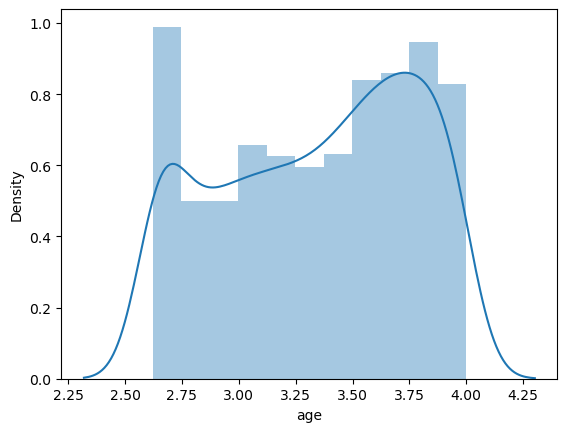

In [59]:
sns.distplot(df['age'])
plt.show()

Graphical checking the skweness of age column. The skewness has been removed and now the data is normally distributed.

In [60]:
# Converting categorical data to numbers
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

smoker1=oe.fit_transform(df['smoker'].values.reshape(-1,1))
df.smoker=smoker1

sex1=oe.fit_transform(df['sex'].values.reshape(-1,1))
df.sex=sex1

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['region'] = le.fit_transform(df['region'])

print(df)

df.dtypes

           age  sex     bmi  children  smoker  region      charges
0     2.668402  0.0  27.900   0.00000     1.0       3  16884.92400
1     2.620741  1.0  33.770   1.00000     0.0       2   1725.55230
2     3.036589  1.0  33.000   1.44225     0.0       2   4449.46200
3     3.207534  1.0  22.705   0.00000     0.0       1  21984.47061
4     3.174802  1.0  28.880   0.00000     0.0       1   3866.85520
...        ...  ...     ...       ...     ...     ...          ...
1333  3.684031  1.0  30.970   1.44225     0.0       1  10600.54830
1334  2.620741  0.0  31.920   0.00000     0.0       0   2205.98080
1335  2.620741  0.0  36.850   0.00000     0.0       2   1629.83350
1336  2.758924  0.0  25.800   0.00000     0.0       3   2007.94500
1337  3.936497  0.0  29.070   0.00000     1.0       1  29141.36030

[1338 rows x 7 columns]


age         float64
sex         float64
bmi         float64
children    float64
smoker      float64
region        int32
charges     float64
dtype: object

All the object datatype has been converted to float and integer datatype.

In [61]:
cor=df.corr()
df_corr=cor['charges'].sort_values(ascending=False)
df_corr

charges     1.000000
smoker      0.787251
age         0.293828
bmi         0.198341
children    0.072756
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

again checking the correlation to find out correlation between categorical and target variable.

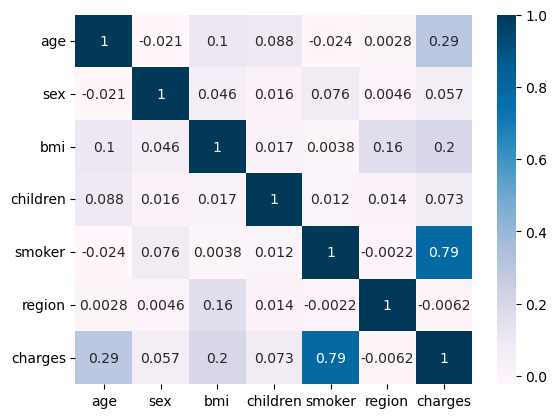

In [62]:
# Visual representation of correlation
sns.heatmap(df.corr(), annot=True, cmap='PuBu')
plt.show()

Smoker and charges are have high positive correlation.
There is no such correlation between region and charges so we can drop it.
Except region, all the columns ahve positive correlation with target column charges.

In [63]:
# Dropping region column
df1=df.drop(['region'], axis=1)
df1

age  sex     bmi  children  smoker      charges
0     2.668402  0.0  27.900   0.00000     1.0  16884.92400
1     2.620741  1.0  33.770   1.00000     0.0   1725.55230
2     3.036589  1.0  33.000   1.44225     0.0   4449.46200
3     3.207534  1.0  22.705   0.00000     0.0  21984.47061
4     3.174802  1.0  28.880   0.00000     0.0   3866.85520
...        ...  ...     ...       ...     ...          ...
1333  3.684031  1.0  30.970   1.44225     0.0  10600.54830
1334  2.620741  0.0  31.920   0.00000     0.0   2205.98080
1335  2.620741  0.0  36.850   0.00000     0.0   1629.83350
1336  2.758924  0.0  25.800   0.00000     0.0   2007.94500
1337  3.936497  0.0  29.070   0.00000     1.0  29141.36030

[1338 rows x 6 columns]

# Model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor

In [65]:
!pip install xgboost

In [66]:
x=df1.drop(["charges"], axis=1)
y=df1["charges"]

In [67]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42)

# Linear Regression

In [68]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7639777982668404
MAE 4243.981307567569


# Best Fit Line

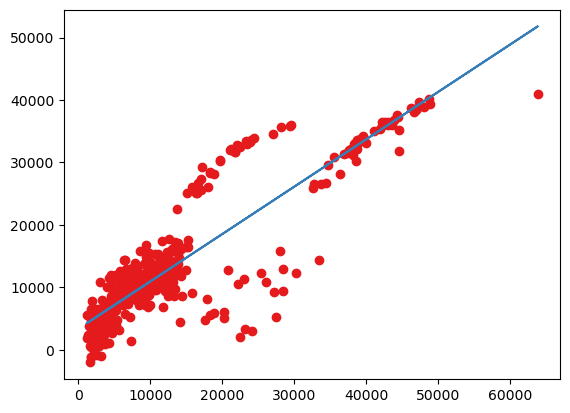

In [69]:
palette = "Set1"
sns.set_palette(palette)
plt.plot(y_test,y_pred,'o')
m,b = np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+b)
plt.show()

# Ridge Regression

In [70]:
R = Ridge(alpha=10)
R.fit(x_train,y_train)
y_pred = R.predict(x_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7599181797994665
MAE 4374.318056834917


# Lasso Regression

In [71]:
L = Lasso(alpha=0.001)
L.fit(x_train,y_train)
y_pred = L.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7639778056151797
MAE 4243.981634082898


# Decision Tree Regression

In [72]:
DT = DecisionTreeRegressor(max_depth=3)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8439713638273123
MAE 2878.460403612173


# Random Forest Regression

In [73]:
RF = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.75,
                             max_features=0.75,
                             max_depth=15)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8567618897464709
MAE 2552.8790368595774


# Extra Tree Regression

In [74]:
ET = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15,
                           bootstrap=True)

ET.fit(x_train,y_train)
y_pred = ET.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8538902751407917
MAE 2744.3342132489815


# ADA Boost Regressor

In [75]:
AB = AdaBoostRegressor(n_estimators=100,learning_rate=1.0)
AB.fit(x_train,y_train)
y_pred = AB.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8291662753916477
MAE 3885.6242665202435


# Gradient Boosting Regressor

In [76]:
GB = GradientBoostingRegressor(n_estimators=100)
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8648371268741999
MAE 2486.2895777862136


# XGB Regressor

In [77]:
XG = XGBRegressor(n_estimators=50,max_depth=3,learning_rate=0.1)
XG.fit(x_train,y_train)
y_pred = XG.predict(x_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8713181558057426
MAE 2436.5943879019355


# DataFrame of all the model and MAE

In [78]:
# Define the models
models = {
    'Linear Regression': LR,
    'Ridge': R,
    'Lasso': L,
    'Decision Tree':DT,
    'Random Forest': RF,
    'Extra Trees': ET,
    'AdaBoost': AB,
    'Gradient Boosting': GB,
    'XGBoost': XG
}

# Create an empty dataframe
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE'])

# Iterate over each model
for model_name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate R2 score and MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append the results to the dataframe
    results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE': mae}, ignore_index=True)

In [79]:
results_df

Model  R2 Score          MAE
0  Linear Regression  0.763978  4243.981308
1              Ridge  0.759918  4374.318057
2              Lasso  0.763978  4243.981634
3      Decision Tree  0.843971  2878.460404
4      Random Forest  0.856762  2552.879037
5        Extra Trees  0.853890  2744.334213
6           AdaBoost  0.822742  4026.156421
7  Gradient Boosting  0.864877  2483.581013
8            XGBoost  0.871318  2436.594388

The best model is XGBoost according to R2Score and Ada Boost according to Mean Asolute Error (MAE)
We can use both the model. 
Let us go ahead with XGBoost model

# Feature Importance

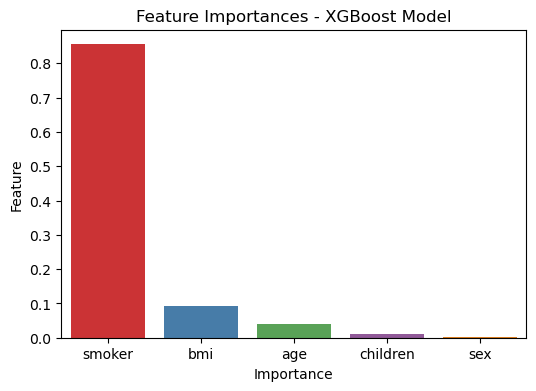

In [80]:
# Train the XGBoost model (I have already trained and named it 'XG')
XG.fit(x_train, y_train)

# Get feature importances
importances = XG.feature_importances_

# Get feature names
feature_names = x_train.columns

# Create a DataFrame to hold feature importance data
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(6,4))
sns.barplot(x='Feature', y='Importance', data=feature_importances_df)
plt.title('Feature Importances - XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Smoking affects the charges. So smoking is the important parameter while computing the charges of insurance

In [81]:
# Saving the file
filename = 'XGBRegressor.pkl'
pickle.dump(XG, open(filename, 'wb'))